This notebook originats from
https://www.kaggle.com/gaohong/roy-s-titanic-notebook


In [1]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [2]:
train[train.Age.isnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [3]:
#Use the Regular Expression to get the title from the name field.
import re
pattern = re.compile(r'.*?,(.*?)\.')
def getTitle(x):
    result = pattern.search(x)
    if result:
        return result.group(1).strip()
    else:
        return ''

train['Title'] = train['Name'].map(getTitle)
test['Title'] = test['Name'].map(getTitle)

#Check how many rows missing the Age by Title
print(train['Title'][train['Age'].isnull()].value_counts())
print(test['Title'][test['Age'].isnull()].value_counts())

#Set the missing Age of Title 'Master' 
master_age_mean = train['Age'][(train['Title']=='Master')&(train['Age']>0)].mean()

# Debug - how to get he index and the colum on that index.
print('*' * 20)
print(train.loc[train[(train['Title']=='Master')&(train['Age'].isnull())].index])
print(train.loc[train[(train['Title']=='Master')&(train['Age'].isnull())].index, 'Age'])

train.loc[train[(train['Title']=='Master')&(train['Age'].isnull())].index, 'Age'] = master_age_mean
test.loc[test[(test['Title']=='Master')&(test['Age'].isnull())].index, 'Age'] = master_age_mean

#Set the missing Age of Title 'Mr' 
mr_age_mean = train['Age'][(train['Title']=='Mr')&(train['Age']>0)].mean()
train.loc[train[(train['Title']=='Mr')&(train['Age'].isnull())].index, 'Age'] = mr_age_mean
test.loc[test[(test['Title']=='Mr')&(test['Age'].isnull())].index, 'Age'] = mr_age_mean

#Set the missing Age of Title 'Miss' or 'Ms'
miss_age_mean = train['Age'][(train['Title']=='Miss')&(train['Age']>0)].mean()
train.loc[train[(train['Title']=='Miss')&(train['Age'].isnull())].index, 'Age'] = miss_age_mean
test.loc[test[((test['Title']=='Miss')|(test['Title']=='Ms'))&(test['Age'].isnull())].index, 'Age'] = miss_age_mean

#Set the missing Age of Title 'Mrs' 
mrs_age_mean = train['Age'][(train['Title']=='Mrs')&(train['Age']>0)].mean()
train.loc[train[(train['Title']=='Mrs')&(train['Age'].isnull())].index, 'Age'] = mrs_age_mean
test.loc[test[(test['Title']=='Mrs')&(test['Age'].isnull())].index, 'Age'] = mrs_age_mean

#Set the missing Age of Title 'Dr' 
dr_age_mean = train['Age'][(train['Title']=='Dr')&(train['Age']>0)].mean()
train.loc[train[(train['Title']=='Dr')&(train['Age'].isnull())].index, 'Age'] = dr_age_mean
test.loc[test[(test['Title']=='Mrs')&(test['Age'].isnull())].index, 'Age'] = dr_age_mean

print(train['Age'].describe())
print(test['Age'].describe())
train.head(3)

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64
Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Title, dtype: int64
********************
     PassengerId  Survived  Pclass  \
65            66         1       3   
159          160         0       3   
176          177         0       3   
709          710         1       3   

                                                  Name   Sex  Age  SibSp  \
65                            Moubarek, Master. Gerios  male  NaN      1   
159                         Sage, Master. Thomas Henry  male  NaN      8   
176                      Lefebre, Master. Henry Forbes  male  NaN      3   
709  Moubarek, Master. Halim Gonios ("William George")  male  NaN      1   

     Parch    Ticket     Fare Cabin Embarked   Title  
65       1      2661  15.2458   NaN        C  Master  
159      2  CA. 2343  69.5500   NaN        S  Master  
176      1      4133  25.4667   NaN        S  Master  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#%config IPython.matplotlib.backend = "retina"

alpha = 0.6
fig = plt.figure(figsize=(8, 12))
grouped = train.groupby(['Survived'])

# survived = 0
group0 = grouped.get_group(0) 
# survived = 1
group1 = grouped.get_group(1)

group1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,Miss
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,NaN,S,Mrs
17,18,1,2,"Williams, Mr. Charles Eugene",male,32.368090,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,35.898148,0,0,2649,7.2250,NaN,C,Mrs


<Figure size 576x864 with 0 Axes>

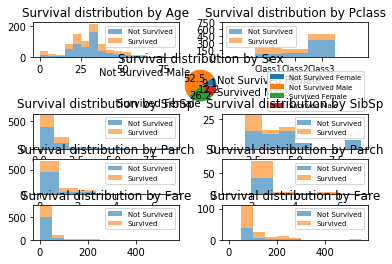

In [5]:

plot_rows = 5
plot_cols = 2
ax1 = plt.subplot2grid((plot_rows,plot_cols), (0,0), rowspan=1, colspan=1)
plt.hist([group0.Age, group1.Age], bins=16, range=(0,80), stacked=True, 
        label=['Not Survived', 'Survived'], alpha=alpha)
plt.legend(loc='best', fontsize='x-small')
ax1.set_title('Survival distribution by Age')

ax2 = plt.subplot2grid((plot_rows,plot_cols), (0,1), rowspan=1, colspan=1)
n, bins, patches = plt.hist([group0.Pclass, group1.Pclass], bins=5, range=(0,5), 
        stacked=True, label=['Not Survived', 'Survived'], alpha=alpha)
plt.legend(loc='best', fontsize='x-small')
ax2.set_xticks([1.5, 2.5, 3.5])
ax2.set_xticklabels(['Class1', 'Class2', 'Class3'], fontsize='small')
ax2.set_yticks([0, 150, 300, 450, 600, 750])
ax2.set_title('Survival distribution by Pclass')

ax3 = plt.subplot2grid((plot_rows,plot_cols), (1,0), rowspan=1, colspan=2)
ax3.set_title('Survival distribution by Sex')
patches, l_texts, p_texts = plt.pie(train.groupby(['Survived', 'Sex']).size(), 
        labels=['Not Survived Female', 'Not Survived Male', 'Survived Female', 'Survived Male'],
        autopct='%3.1f', labeldistance = 1.1, pctdistance = 0.6)
plt.legend(loc='upper right', fontsize='x-small')
for t in l_texts:
    t.set_size(10)
for p in p_texts:
    p.set_size(10)
#plt.legend(loc='best', fontsize='x-small')
plt.axis('equal')

ax4 = plt.subplot2grid((plot_rows,plot_cols), (2,0), rowspan=1, colspan=1)
ax4.set_title('Survival distribution by SibSp')
plt.hist([group0.SibSp, group1.SibSp], bins=9, range=(0,9), stacked=True, 
        label=['Not Survived', 'Survived'], log=False, alpha=alpha)
plt.legend(loc='best', fontsize='x-small')

ax5 = plt.subplot2grid((plot_rows,plot_cols), (2,1), rowspan=1, colspan=1)
ax5.set_title('Survival distribution by SibSp')
plt.hist([group0[group0.SibSp>1].SibSp, group1[group1.SibSp>1].SibSp], bins=8, range=(1, 9), stacked=True, 
        label=['Not Survived', 'Survived'], log=False, alpha=alpha)
plt.legend(loc='best', fontsize='x-small')

ax6 = plt.subplot2grid((plot_rows,plot_cols), (3,0), rowspan=1, colspan=1)
ax6.set_title('Survival distribution by Parch')
plt.hist([group0.Parch, group1.Parch], bins=7, range=(0,7), stacked=True, 
        label=['Not Survived', 'Survived'], log=False, alpha=alpha)
plt.legend(loc='best', fontsize='x-small')

ax7 = plt.subplot2grid((plot_rows,plot_cols), (3,1), rowspan=1, colspan=1)
ax7.set_title('Survival distribution by Parch')
plt.hist([group0[group0.Parch>1].Parch, group1[group1.Parch>1].Parch], bins=6, range=(1, 7), stacked=True, 
        label=['Not Survived', 'Survived'], log=False, alpha=alpha)
plt.legend(loc='best', fontsize='x-small')

ax8 = plt.subplot2grid((plot_rows,plot_cols), (4,0), rowspan=1, colspan=1)
ax8.set_title('Survival distribution by Fare')
plt.hist([group0.Fare, group1.Fare], bins=11, range=(0, 550), stacked=True, 
        label=['Not Survived', 'Survived'], log=False, alpha=alpha)
plt.legend(loc='best', fontsize='x-small')

ax9 = plt.subplot2grid((plot_rows,plot_cols), (4,1), rowspan=1, colspan=1)
ax9.set_title('Survival distribution by Fare')
plt.hist([group0[group0.Fare>50].Fare, group1[group1.Fare>50].Fare], bins=11, range=(0, 550), stacked=True, 
        label=['Not Survived', 'Survived'], log=False, alpha=alpha)
plt.legend(loc='best', fontsize='x-small')
plt.subplots_adjust(wspace=0.3, hspace=0.3)


In [6]:
childgrouped = train[train['Age']<19].groupby(['Survived'])
childgroup0 = childgrouped.get_group(0)
childgroup1 = childgrouped.get_group(1)
parent = train[(train['Age']>18)&(train['Parch']>0)]

# left join on Ticket! So they both have the same ticket.
# Child not survived.
merged0 = pd.merge(childgroup0, parent, how='left', on='Ticket')
merged0.head(3)
merged0 = merged0[['Survived_x', 'Sex_x', 'Age_x', 'Survived_y', 'Sex_y', 'Age_y', 'Ticket']]

# Child not survived BUT adult survived is 0 or 1.
merged0 = merged0[merged0.Survived_y>=0]
merged0.head()

,Survived_x,Sex_x,Age_x,Survived_y,Sex_y,Age_y,Ticket
0,0,male,2.0,0.0,female,29.0,349909
2,0,male,2.0,0.0,female,39.0,382652
3,0,female,8.0,0.0,female,29.0,349909
6,0,male,7.0,0.0,female,41.0,3101295
7,0,male,11.0,0.0,female,43.0,CA 2144


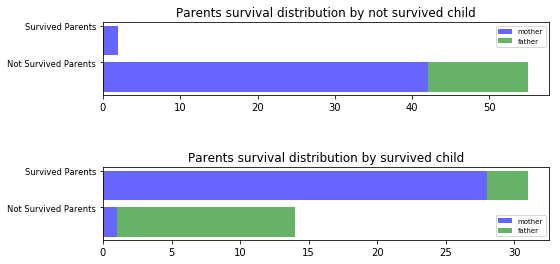

In [7]:

fig = plt.figure(figsize=(8, 4))
plot_rows = 2
plot_cols = 1
ax1 = plt.subplot2grid((plot_rows,plot_cols), (0,0), rowspan=1, colspan=1)
bottom = merged0.Survived_y.value_counts().index
width1 = merged0[merged0['Sex_y']=='female'].Survived_y.value_counts()
plt.barh(bottom, width1, 0.8, 0.0, color='blue', label='mother', alpha=0.6)
width2 = merged0[merged0['Sex_y']=='male'].Survived_y.value_counts()
plt.barh(width2.index, width2, 0.8, width1[width2.index], color='green', label='father', alpha=0.6)
plt.legend(loc='best', fontsize='x-small')
ax1.set_yticks([0.4, 1.4])
ax1.set_yticklabels(['Not Survived Parents', 'Survived Parents'], fontsize='small')
ax1.set_title('Parents survival distribution by not survived child')

merged1 = pd.merge(childgroup1, parent, how='left', on='Ticket')
merged1 = merged1[['Survived_x', 'Sex_x', 'Age_x', 'Survived_y', 'Sex_y', 'Age_y', 'Ticket']]
merged1 = merged1[merged1.Survived_y>=0]
ax2 = plt.subplot2grid((plot_rows,plot_cols), (1,0), rowspan=1, colspan=1)
bottom = merged1.Survived_y.value_counts().index
width1 = merged1[merged1['Sex_y']=='female'].Survived_y.value_counts()
plt.barh(bottom, width1, 0.8, 0.0, color='blue', label='mother', alpha=0.6)
width2 = merged1[merged1['Sex_y']=='male'].Survived_y.value_counts()
plt.barh(width2.index, width2, 0.8, width1[width2.index], color='green', label='father', alpha=0.6)
plt.legend(loc='best', fontsize='x-small')
ax2.set_yticks([0.4, 1.4])
ax2.set_yticklabels(['Not Survived Parents', 'Survived Parents'], fontsize='small')
ax2.set_title('Parents survival distribution by survived child')

plt.subplots_adjust(hspace=1.0)

From the above analysis, we can conclude that if a child is not survived, then the child's parents may not survived also. If a child is survived, the child's mother has big chance to survive than father.

In [8]:
ticket = train['Ticket'][train['Parch']==0]
ticket_dup = ticket.duplicated(False)
index = ticket_dup[ticket_dup==True].index
new_train = train.loc[index]
new_train['FriendsSurvived'] = -1
for i in range(0, len(index)):
    ticketID = new_train.loc[index[i]]['Ticket']
    passengerID = new_train.loc[index[i]]['PassengerId']
    survived = new_train['Survived'][(new_train['Ticket']==ticketID)&(new_train['PassengerId']!=passengerID)]
    new_train.loc[index[i], 'FriendsSurvived'] = round(float(survived.sum())/len(survived))
print(new_train[(new_train['Sex']=='female')&(new_train['Survived']==0)].FriendsSurvived.value_counts())
print(new_train[(new_train['Sex']=='male')&(new_train['Survived']==0)].FriendsSurvived.value_counts())
print(new_train[(new_train['Sex']=='female')&(new_train['Survived']==1)].FriendsSurvived.value_counts())
print(new_train[(new_train['Sex']=='male')&(new_train['Survived']==1)].FriendsSurvived.value_counts())

0    9
Name: FriendsSurvived, dtype: int64
0    38
1    26
Name: FriendsSurvived, dtype: int64
1    36
0    24
Name: FriendsSurvived, dtype: int64
1    19
0     2
Name: FriendsSurvived, dtype: int64


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

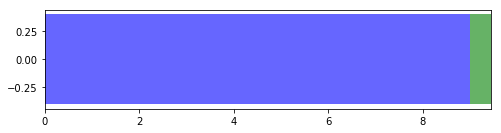

In [9]:
fig = plt.figure(figsize=(8, 4))
plot_rows = 2
plot_cols = 1
ax1 = plt.subplot2grid((plot_rows,plot_cols), (0,0), rowspan=1, colspan=1)
width1 = new_train[(new_train['Sex']=='female')&(new_train['Survived']==0)].FriendsSurvived.value_counts()
plt.barh(width1.index, width1, 0.8, 0.0, color='blue', label='Not survived female', alpha=0.6)
width2 = new_train[(new_train['Sex']=='male')&(new_train['Survived']==0)].FriendsSurvived.value_counts()
plt.barh(width2.index, width2, 0.8, [width1, 0.0], color='green', label='Not survived male', alpha=0.6)
plt.legend(loc='best', fontsize='x-small')
ax1.set_yticks([0.4, 1.4])
ax1.set_yticklabels(['Friends not survived', 'Friends survived'], fontsize='small')
ax1.set_title('Not survived sex distribution by friends survival')

ax2 = plt.subplot2grid((plot_rows,plot_cols), (1,0), rowspan=1, colspan=1)
width1 = new_train[(new_train['Sex']=='female')&(new_train['Survived']==1)].FriendsSurvived.value_counts()
plt.barh(width1.index, width1, 0.8, 0.0, color='blue', label='Survived female', alpha=0.6)
width2 = new_train[(new_train['Sex']=='male')&(new_train['Survived']==1)].FriendsSurvived.value_counts()
plt.barh(width2.index, width2, 0.8, width1[width2.index], color='green', label='Survived male', alpha=0.6)
plt.legend(loc='best', fontsize='x-small')
ax2.set_yticks([0.4, 1.4])
ax2.set_yticklabels(['Friends not survived', 'Friends survived'], fontsize='small')
ax2.set_title('Survived sex distribution by friends survival')

plt.subplots_adjust(hspace=1.0)

So we can conclude from the above figures:

If a woman has friends/SibSp, she was survived if her friends/SibSp survived, and not survived if her friends/SibSp not survived.

If a man has friends/SibSp, he was about 19/(19+26)=42% chance to survive if his friends/SibSp survived, and 2/(2+38)=5% chance to survive if his friends/SibSp not survived.

In [10]:
sex_to_int = {'male':1, 'female':0}
train['SexInt'] = train['Sex'].map(sex_to_int)
# Jim: Another way
# train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
# test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

embark_to_int = {'S': 0, 'C':1, 'Q':2}
train['EmbarkedInt'] = train['Embarked'].map(embark_to_int)
train['EmbarkedInt'] = train['EmbarkedInt'].fillna(0)
print(train.describe())
test['SexInt'] = test['Sex'].map(sex_to_int)
test['EmbarkedInt'] = test['Embarked'].map(embark_to_int)
test['EmbarkedInt'] = test['EmbarkedInt'].fillna(0)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.754659    0.523008   
std     257.353842    0.486592    0.836071   13.277179    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.773973    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.898148    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare      SexInt  EmbarkedInt  
count  891.000000  891.000000  891.000000   891.000000  
mean     0.381594   32.204208    0.647587     0.361392  
std      0.806057   49.693429    0.477990     0.635673  
min      0.000000    0.000000    0.000000     0.000000  
25%      0.000000    7.910400    0.000000     0.000000  
50%      0.000000   14.4542

In [11]:
# And let's create some more new features to indicate if a passenger has friends/SibSp 
# and how many of them are survived or not survived by sex.
ticket = train[train['Parch']==0]
ticket = ticket.loc[ticket.Ticket.duplicated(False)]
grouped = ticket.groupby(['Ticket'])
#The Friends field indicate if the passenger has frineds/SibSp in the boat.
train['Friends'] = 0
#The below fields statistic how many are survived or not survived by sex.
train['Male_Friends_Survived'] = 0
train['Male_Friends_NotSurvived'] = 0
train['Female_Friends_Survived'] = 0
train['Female_Friends_NotSurvived'] = 0
for (k, v) in grouped.groups.items():
    for i in range(0, len(v)):
        train.loc[v[i], 'Friends'] = 1
        train.loc[v[i], 'Male_Friends_Survived'] = train[(train.Ticket==k)&(train.index!=v[i])&(train.Sex=='male')&(train.Survived==1)].Survived.count()
        train.loc[v[i], 'Male_Friends_NotSurvived'] = train[(train.Ticket==k)&(train.index!=v[i])&(train.Sex=='male')&(train.Survived==0)].Survived.count()
        train.loc[v[i], 'Female_Friends_Survived'] = train[(train.Ticket==k)&(train.index!=v[i])&(train.Sex=='female')&(train.Survived==1)].Survived.count()
        train.loc[v[i], 'Female_Friends_NotSurvived'] = train[(train.Ticket==k)&(train.index!=v[i])&(train.Sex=='female')&(train.Survived==0)].Survived.count()

In [12]:
test_ticket = test[test['Parch']==0]
test['Friends'] = 0
test['Male_Friends_Survived'] = 0
test['Male_Friends_NotSurvived'] = 0
test['Female_Friends_Survived'] = 0
test['Female_Friends_NotSurvived'] = 0

grouped = test_ticket.groupby(['Ticket'])
for (k, v) in grouped.groups.items():
    temp_df = train[train.Ticket==k]
    length = temp_df.shape[0]
    if temp_df.shape[0]>0:
        for i in range(0, len(v)):
            test.loc[v[i], 'Friends'] = 1
            test.loc[v[i], 'Male_Friends_Survived'] = temp_df[(temp_df.Sex=='male')&(temp_df.Survived==1)].shape[0]
            test.loc[v[i], 'Male_Friends_NotSurvived'] = temp_df[(temp_df.Sex=='male')&(temp_df.Survived==0)].shape[0]
            test.loc[v[i], 'Female_Friends_Survived'] = temp_df[(temp_df.Sex=='female')&(temp_df.Survived==1)].shape[0]
            test.loc[v[i], 'Female_Friends_NotSurvived'] = temp_df[(temp_df.Sex=='female')&(temp_df.Survived==0)].shape[0]

In [13]:
#And let's create some more new features to indicate if a passenger has Parents/Child and their survival status.
train['FatherOnBoard'] = 0
train['FatherSurvived'] = 0
train['MotherOnBoard'] = 0
train['MotherSurvived'] = 0
train['ChildOnBoard'] = 0
train['ChildSurvived'] = 0
train['ChildNotSurvived'] = 0
grouped = train[train.Parch>0].groupby('Ticket')
for (k, v) in grouped.groups.items():
    for i in range(0, len(v)):
        if train.loc[v[i], 'Age']<19:
            temp = train[(train.Ticket==k)&(train.Age>18)]
            if temp[temp.SexInt==1].shape[0] == 1:
                train.loc[v[i], 'FatherOnBoard'] = 1
                train.loc[v[i], 'FatherSurvived'] = temp[temp.SexInt==1].Survived.sum()
            if temp[temp.SexInt==0].shape[0] == 1:
                train.loc[v[i], 'MotherOnBoard'] = 1
                train.loc[v[i], 'MotherSurvived'] = temp[temp.SexInt==0].Survived.sum()
        else:
            temp = train[(train.Ticket==k)&(train.Age<19)]
            length = temp.shape[0]
            if length>0:
                train.loc[v[i], 'ChildOnBoard'] = 1
                train.loc[v[i], 'ChildSurvived'] = temp[temp.Survived==1].shape[0]
                train.loc[v[i], 'ChildNotSurvived'] = temp[temp.Survived==0].shape[0]
                

In [14]:
test['FatherOnBoard'] = 0
test['FatherSurvived'] = 0
test['MotherOnBoard'] = 0
test['MotherSurvived'] = 0
test['ChildOnBoard'] = 0
test['ChildSurvived'] = 0
test['ChildNotSurvived'] = 0
grouped = test[test.Parch>0].groupby('Ticket')
for (k, v) in grouped.groups.items():
    temp = train[train.Ticket==k]
    length = temp.shape[0]
    if length>0:
        for i in range(0, len(v)):
            if test.loc[v[i], 'Age']<19:
                if temp[(temp.SexInt==1)&(temp.Age>18)].shape[0] == 1:
                    test.loc[v[i], 'FatherOnBoard'] = 1
                    test.loc[v[i], 'FatherSurvived'] = temp[(temp.SexInt==1)&(temp.Age>18)].Survived.sum()
                if temp[(temp.SexInt==0)&(temp.Age>18)].shape[0] == 1:
                    test.loc[v[i], 'MotherOnBoard'] = 1
                    test.loc[v[i], 'MotherSurvived'] = temp[(temp.SexInt==0)&(temp.Age>18)].Survived.sum()
            else:
                length = temp[temp.Age<19].shape[0]
                if length>0:
                    test.loc[v[i], 'ChildOnBoard'] = 1
                    test.loc[v[i], 'ChildSurvived'] = temp[(temp.Age<19)&(temp.Survived==1)].shape[0]
                    test.loc[v[i], 'ChildNotSurvived'] = temp[(temp.Age<19)&(temp.Survived==0)].shape[0]

Text(0.5,1,'Survival distribution by Embarked')

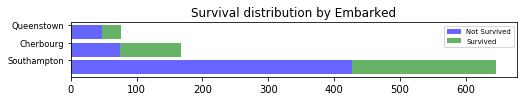

In [15]:
fig = plt.figure(figsize=(8, 1))
grouped = train.groupby(['Survived'])
group0 = grouped.get_group(0)
group1 = grouped.get_group(1)

ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=2)
bottom = group0.EmbarkedInt.value_counts().index
width1 = group0.EmbarkedInt.value_counts()
plt.barh(bottom, width1, 0.8, 0.0, color='blue', label='Not Survived', alpha=0.6)
width2 = group1.EmbarkedInt.value_counts()
plt.barh(bottom, width2, 0.8, width1, color='green', label='Survived', alpha=0.6)
plt.legend(loc='best', fontsize='x-small')
ax1.set_yticks([0.4, 1.4, 2.4])
ax1.set_yticklabels(['Southampton', 'Cherbourg', 'Queenstown'], fontsize='small')
ax1.set_title('Survival distribution by Embarked')

In [16]:
#More feature process work, get the title from the names and map to a new feature, cut the fare and age into category.

title_to_int = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':1, 'Dr':4, 'Rev':4, 'Mlle':2, 'Major':4, 'Col':4,
        'Ms':3, 'Lady':3, 'the Countess':4, 'Sir':4, 'Mme':3, 'Capt':4, 'Jonkheer':4, 'Don':1, 'Dona':3}
train['TitleInt'] = train['Title'].map(title_to_int)
test['TitleInt'] = test['Title'].map(title_to_int)
train.loc[train[train['Age']<13].index, 'TitleInt'] = 5
test.loc[test[test['Age']<13].index, 'TitleInt'] = 5

# Jim - use qcut() can give you same number of items in every bin.
# https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut 
train['FareCat'] = pd.cut(train['Fare'], [-0.1, 50, 100, 150, 200, 300, 1000], right=True, 
        labels=[0, 1, 2, 3, 4, 5])
test['FareCat'] = pd.cut(test['Fare'], [-0.1, 50, 100, 150, 200, 300, 1000], right=True, 
        labels=[0, 1, 2, 3, 4, 5])
train['AgeCat'] = pd.cut(train['Age'], [-0.1, 12.1, 20, 30, 35, 40, 45, 50, 55, 65, 100], right=True, 
        labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test['AgeCat'] = pd.cut(test['Age'], [-0.1, 12.1, 20, 30, 35, 40, 45, 50, 55, 65, 100], right=True, 
        labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5,1,u'Survival distribution by Title')

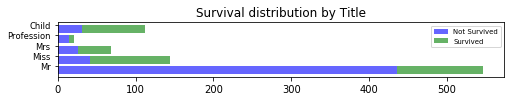

In [17]:
fig = plt.figure(figsize=(8, 1))
grouped = train.groupby(['Survived'])
group0 = grouped.get_group(0)
group1 = grouped.get_group(1)

ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=2)
bottom = group0.TitleInt.value_counts().index
width1 = group0.TitleInt.value_counts()
plt.barh(bottom, width1, 0.8, 0.0, color='blue', label='Not Survived', alpha=0.6)
width2 = group1.TitleInt.value_counts()
plt.barh(bottom, width2, 0.8, width1, color='green', label='Survived', alpha=0.6)
plt.legend(loc='best', fontsize='x-small')
ax1.set_yticks([1.4, 2.4, 3.4, 4.4, 5.4])
ax1.set_yticklabels(['Mr', 'Miss', 'Mrs', 'Profession', 'Child'], fontsize='small')
ax1.set_title('Survival distribution by Title')



In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
#columns = ['Pclass', 'SibSp', 'Parch', 'SexInt', 'EmbarkedInt', 'AgeCat', 'TitleInt', 'FareCat']
#columns = ['Pclass', 'SibSp', 'Parch', 'SexInt', 'EmbarkedInt', 'AgeInt', 'TitleInt', 'Fare']
#columns = ['Pclass', 'FamilySize', 'SexInt', 'EmbarkedInt', 'AgeCat', 'TitleInt', 'FareCat']
#columns = ['Pclass', 'FamilySize', 'SexInt', 'EmbarkedInt', 'AgeCat', 'TitleInt', 'FareCat',
#        'Friends', 'FriendsSex', 'FriendsSurvived']
#columns = ['Pclass', 'SibSp', 'Parch', 'SexInt', 'EmbarkedInt', 'AgeCat', 'TitleInt', 'FareCat',
#        'Friends', 'FriendsSex', 'FriendsSurvived', 'FatherSurvived', 'MotherSurvived', 'ChildSurvived']
#columns = ['Pclass', 'SibSp', 'Parch', 'SexInt', 'EmbarkedInt', 'AgeCat', 'TitleInt', 'FareCat']
#        'Friends', 'FriendsSex', 'FriendsSurvived']
#columns = ['Pclass', 'SexInt', 'EmbarkedInt', 'Age', 'TitleInt','Fare', 'Friends', 'FriendsSex', 'FriendsSurvived', 'FatherSurvived', 'MotherSurvived', 'ChildSurvived']
columns = ['Pclass', 'SexInt', 'EmbarkedInt', 'Age', 'TitleInt','Fare', 
        'Friends', 'Male_Friends_Survived', 'Male_Friends_NotSurvived', 'Female_Friends_Survived', 'Female_Friends_NotSurvived',
        'MotherOnBoard', 'MotherSurvived', 'ChildOnBoard', 'ChildSurvived', 'ChildNotSurvived']
X_train, X_test, y_train, y_test = train_test_split(train[columns], train['Survived'], test_size=0.2, random_state=123)

#Check the features importance. 
selected = SelectKBest(f_classif, 5)
selected.fit(X_train, y_train)
# Reduce X to the selected features.
X_train_selected = selected.transform(X_train)
X_test_selected = selected.transform(X_test)
print(selected.scores_)
print(selected.pvalues_)
print(X_train_selected.shape)



[8.27831448e+01 2.90380939e+02 6.88728741e+00 8.58676543e+00
 1.33738995e+02 4.24175317e+01 1.01605156e+01 4.77379310e+00
 1.28604845e-01 1.09855971e+01 3.21188268e+00 4.56218089e-01
 2.64816498e+01 6.68289216e-01 1.38540766e+01 6.30837681e+00]
[9.09034019e-19 7.60801931e-55 8.86772058e-03 3.49483036e-03
 1.84409616e-28 1.39555071e-10 1.49772948e-03 2.92223165e-02
 7.19989598e-01 9.64861114e-04 7.35309919e-02 4.99616694e-01
 3.44706332e-07 4.13922938e-01 2.13202046e-04 1.22377230e-02]
(712, 5)


# Very time consuming.



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 150, 200, 250], 'min_samples_leaf': [ 4, 8, 10, 12], 
        'max_depth': [ 5, 10, 50, 80], 'max_features': [None, 'auto'], 'min_samples_split': [2, 4, 8]}
rfc = RandomForestClassifier(criterion='gini', min_weight_fraction_leaf=0.0, 
        max_leaf_nodes=None, bootstrap=True, oob_score=False, 
        n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

# classifer = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
# classifer.fit(X_train, y_train)

# A lot of output here
# print(classifer.grid_scores_) 

# result is 
# {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 250, 'max_depth': 10, 'min_samples_leaf': 4}
#print(classifer.best_params_)
#print(X_train.info())




/Users/jim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
# https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83 has a gridsearch for KNN in [13]

from sklearn.neighbors import KNeighborsClassifier #KNN

n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), n_jobs=-1, param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1936 tasks      | elapsed:    4.8s


0.77613368456
KNeighborsClassifier(algorithm='auto', leaf_size=21, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    5.5s finished


In [19]:
X_train

,Pclass,SexInt,EmbarkedInt,Age,TitleInt,Fare,Friends,Male_Friends_Survived,Male_Friends_NotSurvived,Female_Friends_Survived,Female_Friends_NotSurvived,MotherOnBoard,MotherSurvived,ChildOnBoard,ChildSurvived,ChildNotSurvived
329,1,0,1.0,16.000000,2,57.9792,0,0,0,0,0,1,1,0,0,0
749,3,1,2.0,31.000000,1,7.7500,0,0,0,0,0,0,0,0,0,0
203,3,1,1.0,45.500000,1,7.2250,0,0,0,0,0,0,0,0,0,0
421,3,1,2.0,21.000000,1,7.7333,0,0,0,0,0,0,0,0,0,0
97,1,1,1.0,23.000000,1,63.3583,0,0,0,0,0,0,0,0,0,0
714,2,1,0.0,52.000000,1,13.0000,1,0,1,0,0,0,0,0,0,0
43,2,0,1.0,3.000000,5,41.5792,0,0,0,0,0,1,1,0,0,0
841,2,1,0.0,16.000000,1,10.5000,1,0,0,0,1,0,0,0,0,0
520,1,0,0.0,30.000000,2,93.5000,0,0,0,0,0,0,0,0,0,0
652,3,1,0.0,21.000000,1,8.4333,0,0,0,0,0,0,0,0,0,0


In [20]:
rfc = RandomForestClassifier(n_estimators=250, criterion='gini', max_depth=10, 
        min_samples_split=8, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
        max_features='auto', max_leaf_nodes=None, bootstrap=True, 
        oob_score=False, n_jobs=1, random_state=232, verbose=0, warm_start=False, class_weight=None)

rfc.fit(X_train, y_train)


result = rfc.predict(X_test)
rightnum = 0


# Calculate accuracy - Should have a better way.
for i in range(0, result.shape[0]):
    if result[i] == y_test.iloc[i]:
        rightnum += 1
print(rightnum/result.shape[0])

# better way to get score.
print(rfc.score(X_train, y_train))

rfc.fit(train[columns], train['Survived'])
predict_rf = rfc.predict(test[columns])

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict_rf
    })
submission.to_csv("titanic_predict_RF.csv", index=False)

# The RF gives a 0.88268 accuracy rate on the test parts. And generate the prediction on the test dataset. 
# The prediction score is 0.78947.


0
0.869382022472


In [21]:
# Let's use XGB to do the train and prediton, to compare with RF. 
# The accuracy rate of the test pars are 0.8715, close to RF. The prediction score is 0.76077

import xgboost as xgb
xgbclassifer = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
xgbclassifer.fit(X_train, y_train)
result = xgbclassifer.predict(X_test)
print(result[:10])
rightnum = 0
for i in range(0, result.shape[0]):
    if result[i] == y_test.iloc[i]:
        rightnum += 1
print(rightnum/result.shape[0])

# better way to get score.
print(xgbclassifer.score(X_train, y_train))

xgbclassifer.fit(train[columns], train['Survived'])
predict_xgb = xgbclassifer.predict(test[columns])

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict_xgb
    })
submission.to_csv("titanic_predict_xgb.csv", index=False)


[1 0 0 0 0 0 1 1 0 0]
0.88268156424581
0.9087078651685393


/Users/jim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/jim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/jim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:

import numpy as np
from __future__ import absolute_import

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X_train_scaled = stdScaler.fit_transform(X_train)
X_test_scaled = stdScaler.transform(X_test)
model = Sequential()
#model.add(Dense(700, input_dim=7, init='normal', activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1600, input_dim=16, init='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, init='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.fit(X_train_scaled, y_train, nb_epoch=20, batch_size=32)
result = model.predict(X_test_scaled)
rightnum = 0
for i in range(0, result.shape[0]):
    if result[i] >= 0.5:
        result[i] = 1
    else:
        result[i] = 0
    if result[i] == y_test.iloc[i]:
        rightnum += 1
print(rightnum/result.shape[0])

train_scaled = stdScaler.fit_transform(train[columns])
test_scaled = stdScaler.transform(test[columns])
model.fit(train_scaled, train['Survived'], nb_epoch=20, batch_size=32, verbose=0)

predict_NN = model.predict(test_scaled)
print(predict_NN.shape)
for i in range(0, predict_NN.shape[0]):
    if predict_NN[i] >= 0.5:
        predict_NN[i] = 1
    else:
        predict_NN[i] = 0
        
predict_NN = predict_NN.reshape((predict_NN.shape[0]))
predict_NN = predict_NN.astype('int')
print(predict_NN.shape)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict_NN
    })
submission.to_csv("titanic_predict_NN.csv", index=False)

/Users/jim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1600, input_dim=16, activation="relu", kernel_initializer="normal")`
  app.launch_new_instance()
/Users/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="normal")`
/Users/jim/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
712/712 [==============================] - 0s 213us/step - loss: 0.4841
Epoch 2/20
712/712 [==============================] - 0s 50us/step - loss: 0.4064
Epoch 3/20
712/712 [==============================] - 0s 53us/step - loss: 0.3936
Epoch 4/20
712/712 [==============================] - 0s 52us/step - loss: 0.3836
Epoch 5/20
712/712 [==============================] - 0s 56us/step - loss: 0.3731
Epoch 6/20
712/712 [==============================] - 0s 52us/step - loss: 0.3759
Epoch 7/20
712/712 [==============================] - 0s 50us/step - loss: 0.3661
Epoch 8/20
712/712 [==============================] - 0s 55us/step - loss: 0.3642
Epoch 9/20
712/712 [==============================] - 0s 53us/step - loss: 0.3622
Epoch 10/20
712/712 [==============================] - 0s 51us/step - loss: 0.3580
Epoch 11/20
712/712 [==============================] - 0s 56us/step - loss: 0.3661
Epoch 12/20
712/712 [==============================] - 0s 54us/step - loss: 0.3524
Epoch 13/20


In [25]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
rightnum = 0
for i in range(0, result.shape[0]):
    if result[i] == y_test.iloc[i]:
        rightnum += 1
print(rightnum/result.shape[0])

print(clf.score(X_train, y_train))
predict_svm = clf.predict(test[columns])

0
0.883426966292


# Let different MLAs vote for the best result.

In [26]:
predict_combine = np.zeros((test.shape[0]))
for i in range(0, test.shape[0]):
    temp = predict_rf[i] + predict_NN[i] + predict_GP[i] # Doesn't work, GP is not included here.
    if temp>=2:
        predict_combine[i] = 1
predict_combine = predict_combine.astype('int')

combination = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict_combine
    })
combination.to_csv("titanic_predict_combine.csv", index=False)

NameError: name 'predict_GP' is not defined

# TODO
* try StandardScaler - https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83 [12]
* try qcut()
* learn more parameters of NN.
